In [37]:
import dlib
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import numpy as np
import random

In [2]:
dlib.DLIB_USE_CUDA = False

In [3]:

imgs_path = '/kaggle/input/facial-recognition-with-dlib/imgs'
database_path = '/kaggle/input/facial-recognition-with-dlib/database'
test_path = '/kaggle/input/facial-recognition-with-dlib/testing imgs'
cnn_model_path = '/kaggle/input/facial-recognition-with-dlib/mmod_human_face_detector.dat'
shape_predictor_path = "/kaggle/input/facial-recognition-with-dlib/shape_predictor_68_face_landmarks_GTX.dat"
face_recognition_model_path = "/kaggle/input/facial-recognition-with-dlib/dlib_face_recognition_resnet_model_v1.dat"
output_path = '/kaggle/working'

cnn_face_detector = dlib.cnn_face_detection_model_v1(cnn_model_path)
predictor = dlib.shape_predictor(shape_predictor_path)
face_rec = dlib.face_recognition_model_v1(face_recognition_model_path)


In [32]:

def detect_faces_from_path(path ='',rows = 2):

    face_descs = {}

    fig = plt.figure(figsize=(15, 7))
    total_imgs = len(os.listdir(path))
    if total_imgs % rows == 0:
        columns = total_imgs // rows
    else :
        columns = total_imgs // rows + 1


    print(total_imgs)
    for j,f in enumerate(os.listdir(path)):
        if (f.endswith('md')):
            print(f)
            continue
        print("Processing file: {}".format(f))
        img = dlib.load_rgb_image(path +'/'+ f)
        print(img.shape)
        # The 1 in the second argument indicates that we should upsample the image
        # 1 time.  This will make everything bigger and allow us to detect more
        # faces.
        faces = cnn_face_detector(img)
    
        print("Number of faces detected: {}".format(len(faces)))
        for i, d in enumerate(faces):
            #print(type(d))
            print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(
                i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))
            
            shape = predictor(img, d.rect)
            face_descriptor = face_rec.compute_face_descriptor(img, shape, 15)
            face_descs[f[:-4]]=face_descriptor
            
            Left = d.rect.left()
            Top = d.rect.top()
            Right = d.rect.right()
            Bottom = d.rect.bottom()
            #print(f'WIDTH = {Right - Left}\nHEIGHT = {Bottom - Top}')

            thickness = int(np.sqrt((Right - Left)**2 + (Bottom - Top)**2)/25)
            print(thickness)
            for idx in range(shape.num_parts):
                coords = (shape.part(idx).x,shape.part(idx).y)
                img = cv2.circle(img, coords, 5, (0,255,0), -1)

            img = cv2.rectangle(img,(Left,Top),(Right,Bottom),(255,0,0),thickness = thickness)
            # Adds a subplot at the 1st position
        fig.add_subplot(rows, columns, j+1)
            
            # showing image
        plt.imshow(img)
        plt.axis('off')
        plt.title(f[:-4])
    return face_descs


17
Processing file: bill gates 4.PNG
(336, 386, 3)
Number of faces detected: 1
Detection 0: Left: 104 Top: 78 Right: 240 Bottom: 215 Confidence: 1.0791996717453003
7
Processing file: bill gates 2.PNG
(253, 228, 3)
Number of faces detected: 1
Detection 0: Left: 35 Top: 42 Right: 171 Bottom: 178 Confidence: 1.0394340753555298
7
Processing file: toby 3.PNG
(273, 190, 3)
Number of faces detected: 1
Detection 0: Left: 40 Top: 63 Right: 154 Bottom: 177 Confidence: 1.08910071849823
6
Processing file: bill gates.PNG
(303, 227, 3)
Number of faces detected: 1
Detection 0: Left: 35 Top: 43 Right: 171 Bottom: 180 Confidence: 1.0569896697998047
7
Processing file: jeff 2.PNG
(217, 269, 3)
Number of faces detected: 1
Detection 0: Left: 68 Top: 20 Right: 147 Bottom: 99 Confidence: 0.982864260673523
4
Processing file: musk 2.PNG
(240, 157, 3)
Number of faces detected: 1
Detection 0: Left: 28 Top: 36 Right: 107 Bottom: 115 Confidence: 0.48194247484207153
4
Processing file: jeff 3.PNG
(227, 168, 3)
Numbe

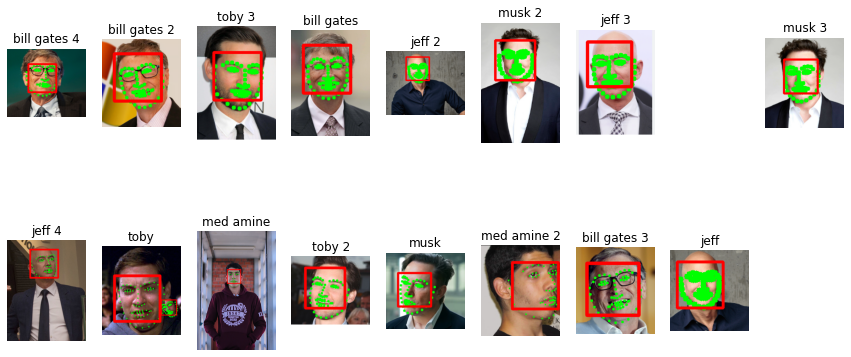

In [33]:
descriptors = detect_faces_from_path(path =imgs_path,rows = 2)

In [6]:
dist = np.linalg.norm(np.array(descriptors["jeff 2"]) - np.array(descriptors["jeff"]))
print(dist)
#print(np.array(descriptors["eni"]).shape)

0.04534628533730084


In [7]:
for person in descriptors.keys():
    for person2 in descriptors.keys():
        dist = np.linalg.norm(np.array(descriptors[person]) - np.array(descriptors[person2]))
        if dist < 0.55 :
            print(f'{person} x {person2} : { round(dist, 3)}')

bill gates 4 x bill gates 4 : 0.0
bill gates 4 x bill gates 2 : 0.39
bill gates 4 x bill gates : 0.397
bill gates 4 x bill gates 3 : 0.441
bill gates 2 x bill gates 4 : 0.39
bill gates 2 x bill gates 2 : 0.0
bill gates 2 x bill gates : 0.376
bill gates 2 x bill gates 3 : 0.451
toby 3 x toby 3 : 0.0
toby 3 x toby 2 : 0.357
bill gates x bill gates 4 : 0.397
bill gates x bill gates 2 : 0.376
bill gates x bill gates : 0.0
bill gates x bill gates 3 : 0.521
jeff 2 x jeff 2 : 0.0
jeff 2 x jeff 3 : 0.334
jeff 2 x jeff 4 : 0.364
jeff 2 x jeff : 0.045
musk 2 x musk 2 : 0.0
musk 2 x musk 3 : 0.066
musk 2 x musk : 0.379
jeff 3 x jeff 2 : 0.334
jeff 3 x jeff 3 : 0.0
jeff 3 x jeff 4 : 0.338
jeff 3 x jeff : 0.325
musk 3 x musk 2 : 0.066
musk 3 x musk 3 : 0.0
musk 3 x musk : 0.366
jeff 4 x jeff 2 : 0.364
jeff 4 x jeff 3 : 0.338
jeff 4 x jeff 4 : 0.0
jeff 4 x jeff : 0.357
toby x toby : 0.0
med amine x med amine : 0.0
med amine x med amine 2 : 0.425
toby 2 x toby 3 : 0.357
toby 2 x toby 2 : 0.0
musk x m

In [10]:
def calculate_distance(descriptor1 = None ,descriptor2 = None):
    return np.linalg.norm(np.array(descriptor1) - np.array(descriptor2))

    

In [12]:
def get_descriptors(imgs_path =''):
    face_descriptors = []
    for f in os.listdir(imgs_path):
        img = dlib.load_rgb_image(imgs_path +'/'+ f)

        faces = cnn_face_detector(img)
    
        print("Number of faces detected: {}".format(len(faces)))
        for i, d in enumerate(faces):   
            cache = {}
            shape = predictor(img, d.rect)
            face_descriptor = face_rec.compute_face_descriptor(img, shape, 10)                       
            img_path = imgs_path +'/'+ f
            img_name = f[:-4]
            
            cache["face descriptor"] = face_descriptor
            cache["img name"] = img_name
            cache["img path"] = img_path
            cache["bounding box"] = d.rect
            
            
            face_descriptors.append(cache)
            
    return face_descriptors

In [13]:
db_descriptors = get_descriptors(imgs_path =database_path)

Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1


In [14]:
test_descriptors = get_descriptors(imgs_path =test_path)

Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 2
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1


In [15]:
print(len(test_descriptors))

15


In [16]:
for test_face in test_descriptors:
    for db_face in db_descriptors:

        dist = calculate_distance(np.array(test_face["face descriptor"]) , np.array(db_face["face descriptor"]))
        if dist < 0.55 :
            print(f'{test_face["img name"]} x {db_face["img name"]} : { round(dist, 3)}')

bill gates 4 x bill gates : 0.397
bill gates 2 x bill gates : 0.383
jeff 2 x Jeff Bezos : 0.365
musk 2 x Elon Musk : 0.102
jeff 3 x Jeff Bezos : 0.354
toby x Toby Maguire : 0.529
toby 2 x Toby Maguire : 0.386
musk x Elon Musk : 0.361
med amine 2 x Mohamed Amine : 0.428
bill gates 3 x bill gates : 0.521
jeff x Jeff Bezos : 0.36


In [17]:
def recognize(db_descriptors = None ,test_descriptors = None):
    for test_face in test_descriptors:
        distances = []
        for db_face in db_descriptors:

            dist = calculate_distance(np.array(test_face["face descriptor"]) , np.array(db_face["face descriptor"]))
            distances.append(dist)
            
        idx = np.argmin(distances)
        print(distances , idx)
        if distances[idx] > 0.55:
            test_face["img name"] = "UNKNOWN"
            print(idx)
        else:
            test_face["img name"] = db_descriptors[idx]["img name"]
        
        
                
                

In [18]:
recognize(db_descriptors,test_descriptors)

[0.7588783208260683, 0.3974781966780521, 0.7749428631450572, 0.7584827284560111, 0.8361555687125671] 1
[0.7607511880990284, 0.38307936475821375, 0.7511383694138257, 0.7376999878142714, 0.8045864354403472] 1
[0.3648876082385856, 0.8362343376084201, 0.7737680195346747, 0.8619555386598877, 0.7476269685697339] 0
[0.7986514049733833, 0.7920303177250002, 0.10205074777887084, 0.7439223985674102, 0.8410257799042496] 2
[0.3542016757430717, 0.8386724510315167, 0.8191785884622823, 0.9108626927578966, 0.7930236921380274] 0
[0.805018873113839, 0.8593067015555326, 0.8580729321699606, 0.8947606741530848, 0.6974306288906329] 4
4
[0.7889729606321056, 0.704117349748721, 0.7619275437776752, 0.5293248456925823, 0.6565783449185292] 3
[0.7684869602438098, 0.7180376919973779, 0.7262364848019169, 0.6027674537797192, 0.5640312882774514] 4
4
[0.7882056967429728, 0.7551776246332322, 0.8472052899533132, 0.8428342836802382, 0.8142905606308006] 1
1
[0.9160076002904224, 0.8297663560886952, 0.7940528209434037, 0.3863

In [19]:
for t in test_descriptors:
    print(t["img name"])

bill gates
bill gates
Jeff Bezos
Elon Musk
Jeff Bezos
UNKNOWN
Toby Maguire
UNKNOWN
UNKNOWN
Toby Maguire
Elon Musk
Mohamed Amine
UNKNOWN
bill gates
Jeff Bezos


In [58]:
def display(test_descriptors = None, rows = 2 , save_output = False ,save_path = ''):
    
    fig = plt.figure(figsize=(15, 7))
    
    total_imgs = len(test_descriptors)
    if total_imgs % rows == 0:
        columns = total_imgs // rows
    else :
        columns = total_imgs // rows + 1
    
    for j, test_face in enumerate(test_descriptors):
        
        img = dlib.load_rgb_image(test_face["img path"])
        left = test_face["bounding box"].left()
        top = test_face["bounding box"].top()
        right = test_face["bounding box"].right()
        bottom = test_face["bounding box"].bottom()
        
        img = cv2.rectangle(img,(left,top),(right,bottom),(255,0,0),thickness = 4)
        #img = cv2.putText(img,(left,top),text = test_face["img name"], fontScale = 2, color = (255,0,0), thickness = 2 )
            # Adds a subplot at the 1st position
        fig.add_subplot(rows, columns, j+1)
            
            # showing image
        plt.imshow(img)
        plt.axis('off')
        plt.title(test_face["img name"])
        if save_output:
            img_with_text = cv2.putText(img,test_face["img name"],(left,top),
                                        cv2.FONT_HERSHEY_SIMPLEX, 1,
                                        (0,0,0),thickness = 2)
            
            img_with_text = cv2.cvtColor(img_with_text, cv2.COLOR_BGR2RGB)                        
            cv2.imwrite(save_path +'/'+ test_face["img name"] + str(j+1) + ".png",
                        img_with_text)

        
    if save_output:
        plt.savefig(save_path +'/' + 'output_fig.png')
        
        

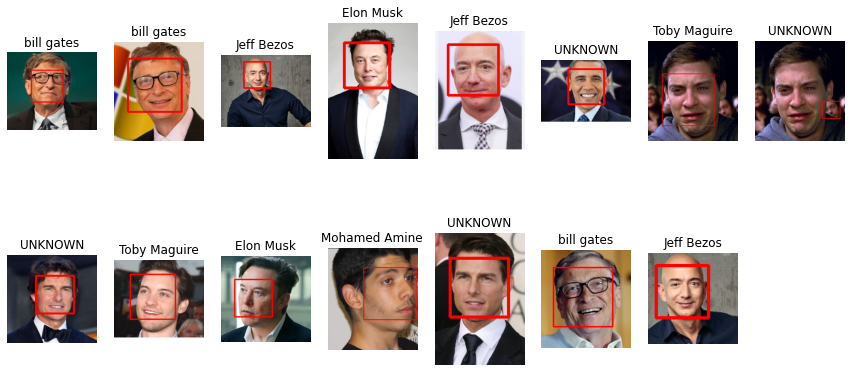

In [59]:
display(test_descriptors,save_output = True, save_path = output_path)

In [36]:
print(os.listdir('/kaggle/working/'))

['Elon Musk4.png', 'Elon Musk11.png', 'bill gates1.png', 'bill gates14.png', 'Mohamed Amine12.png', 'Jeff Bezos3.png', '.virtual_documents', 'Toby Maguire7.png', '__notebook_source__.ipynb', 'Jeff Bezos5.png', 'UNKNOWN6.png', 'bill gates2.png', 'output_fig.png', 'UNKNOWN13.png', 'Jeff Bezos15.png', 'UNKNOWN9.png', 'Toby Maguire10.png', 'UNKNOWN8.png']


<class 'numpy.ndarray'>


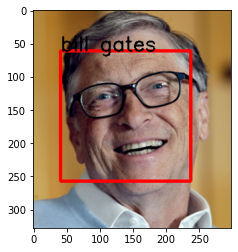

In [76]:
#plt.imshow('/kaggle/working/')
randimg = os.listdir('/kaggle/working/')[random.randint(0,9)]
img = cv2.imread('/kaggle/working/' + randimg)
print(type(img))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))